In [1]:
import numpy as np
import pandas as pds
from matplotlib import gridspec
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from astropy import units as u
from astropy.coordinates import SkyCoord,Angle 
from astropy.io import ascii
from astropy.units import Quantity
#from astroquery.gaia import Gaia
import os
import warnings, scipy
from astropy.wcs import WCS
from astropy.io import fits
from matplotlib.colors import LogNorm
warnings.filterwarnings("ignore")
from astropy.utils.data import get_pkg_data_filename
import astropy.units as u
from astropy.coordinates import CartesianRepresentation
from astropy.coordinates import UnitSphericalRepresentation
from scipy.stats import gaussian_kde
import scipy.stats as stats

# Data Loading

In [6]:
os.chdir('D:\\Documents\Research\Supernova Remnant Data')
snr_data = ascii.read('snrsdata.txt')
year_to_sec = 52*7*24*3600
t = 3                              
snr_name = snr_data[t][0]
snr_center_ra = snr_data[t][1]
snr_center_dec = snr_data[t][2]
snr_coords = SkyCoord(ra=snr_center_ra, dec = snr_center_dec, unit= (u.deg,u.deg))
snr_size = snr_data[t][3]
snr_dist = snr_data[t][4]
snr_age = snr_data[t][5]
snr_center_rms_ra = snr_data[t][6]
snr_center_rms_dec = snr_data[t][7]
snr_radius = snr_size*u.arcmin
snr_radius_degrees = snr_radius.to(u.deg)
snr_center_error_ra = snr_data[t][8]
snr_center_error_dec = snr_data[t][9]
snr_distance_low_estimate = snr_data[t][10]
snr_distance_high_estimate = snr_data[t][11]
#snr_coords_2 = SkyCoord(ra = snr_gra, dec = snr_gdec, unit= (u.deg,u.deg))
snr_coords_rms = SkyCoord(ra = snr_center_rms_ra, dec = snr_center_rms_dec, unit= (u.deg,u.deg))
#snr_coords_rms_2 = SkyCoord(ra = snr_center_rms_ra_2, dec = snr_center_rms_dec_2, unit= (u.deg,u.deg))
#os.mkdir('D:\\Supernova Remnant Data/' + snr_name)
os.chdir('D:\\Documents\Research\Supernova Remnant Data/' + snr_name)
print('Loaded SNR: ' + snr_name)

Loaded SNR: G11.2-0.3


In [7]:
#ss = ascii.read(snr_name + ' gaussian star magnitude printout.txt')
#xbr = ss[0][0:]
#xg = ss[1][0:]
#zpdf = ss[2][0:]

In [8]:
vs = ascii.read(snr_name + ' sample stars.txt')
sample_parallax = vs['parallax']
sample_parallax_error = vs['parallax_error']
sample_distance = 1/(sample_parallax)*1000
sample_pmra = vs['pmra']
sample_pmra_error = vs['pmra_error']
sample_pmdec = vs['pmdec']
sample_pmdec_error = vs['pmdec_error']
sample_ra = vs['ra']
sample_dec = vs['dec']
sample_g_mag_app = vs['phot_g_mean_mag']
sample_g_flux = vs['phot_g_mean_flux']
sample_g_flux_error = vs['phot_g_mean_flux_error']
sample_rp_flux = vs['phot_rp_mean_flux']
sample_rp_flux_error = vs['phot_rp_mean_flux_error']
sample_a_g_extinction = vs['a_g_val']
sample_bp_flux = vs['phot_bp_mean_flux']
sample_bp_flux_error = vs['phot_bp_mean_flux_error']
sample_parallax = vs['parallax']
sample_parallax_error = vs['parallax_error']
sample_br_extinction = vs['e_bp_min_rp_val']
sample_br_color = vs['bp_rp']
bulk_motion_pmra = np.median(sample_pmra)
bulk_motion_pmdec = np.median(sample_pmdec)
total_sample_number = len(sample_parallax)
print(total_sample_number)

14908


In [9]:
image_file = fits.open(snr_name + ' Green.fits')
image_file.info()
image_data = image_file[0].data
image_header = image_file[0]
wcs = WCS(image_header.header)
image_file.close

Filename: G11.2-0.3 Green.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     168   (300, 300)   float32   


<bound method HDUList.close of [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001B3D7EACA20>]>

In [10]:
contour_points = ascii.read(snr_name + ' contour.txt')
contour_ra = contour_points[0][0:]
contour_dec = contour_points[0][1:]

In [11]:
ds = ascii.read(snr_name + ' potential stars.txt')
star_id = ds['designation']
ra = ds['ra']
dec = ds['dec']
pmra = ds['pmra']
pmdec = ds['pmdec']
pmra_error = ds['pmra_error']
pmdec_error = ds['pmdec_error']
parallax = ds['parallax']
parallax_error = ds['parallax_error']
g_mag_app = ds['phot_g_mean_mag']
g_flux = ds['phot_g_mean_flux']
g_flux_error = ds['phot_g_mean_flux_error']
rp_mag_app = ds['phot_rp_mean_mag']
rp_flux = ds['phot_rp_mean_flux']
rp_flux_error = ds['phot_rp_mean_flux_error']
bp_mag_app = ds['phot_bp_mean_mag']
bp_flux = ds['phot_bp_mean_flux']
bp_flux_error = ds['phot_bp_mean_flux_error']
radial_vel = ds['radial_velocity']
radial_vel_error = ds['radial_velocity_error']
teff = ds['teff_val']
teff_error_lower = ds['teff_percentile_lower']
teff_error_upper = ds['teff_percentile_upper']
a_g_extinction = ds['a_g_val']
a_g_extinction_error_lower = ds['a_g_percentile_lower']
a_g_extinction_error_upper = ds['a_g_percentile_upper']
br_extinction = ds['e_bp_min_rp_val']
br_extinction_error_lower = ds['e_bp_min_rp_percentile_lower']
br_extinction_error_upper = ds['e_bp_min_rp_percentile_upper']
luminosity = ds['lum_val']
luminosity_error_lower = ds['lum_percentile_lower']
luminosity_error_upper = ds['lum_percentile_upper']
br_color = ds['bp_rp']
distance = 1/(parallax)*1000
parallax_sn = ds['parallax_over_error']
green_sn = ds['phot_g_mean_flux_over_error']
red_sn = ds['phot_rp_mean_flux_over_error']
blue_sn = ds['phot_bp_mean_flux_over_error']
ra_error = ds['ra_error']
dec_error = ds['dec_error']
distance_error_low = (1/(parallax+parallax_error))*1000
distance_error_high = (1/(parallax-parallax_error))*1000
low_dist_err = distance - distance_error_low
high_dist_err = distance_error_high - distance
low_snr_dist = snr_dist - snr_distance_low_estimate
high_snr_dist = snr_distance_high_estimate - snr_dist
near_snr = np.where((distance >= snr_distance_low_estimate) & (distance <= snr_distance_high_estimate))

# Extinction Corrections

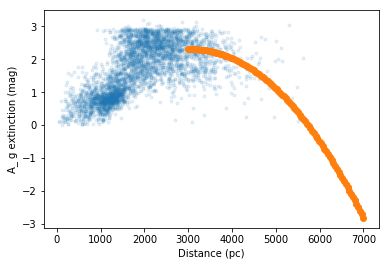

In [12]:
g_ext_sample = sample_a_g_extinction[np.where(sample_a_g_extinction)]
dist_ext_sample = sample_distance[np.where(sample_a_g_extinction)]
if (len(g_ext_sample) == 0.0):
    g_ext_sample = np.zeros(len(a_g_extinction))
    dist_ext_sample = distance
plt.plot(dist_ext_sample , g_ext_sample ,'.', alpha = 0.1)
fit_constants = np.polyfit(dist_ext_sample, g_ext_sample, 3)
fit_distance = np.linspace(0.6*snr_dist, 1.4*snr_dist , 100)
fit = fit_constants[0]*fit_distance**3 + fit_constants[1]*fit_distance**2 + fit_constants[2]*fit_distance + fit_constants[3]
plt.plot(fit_distance, fit, 'o')
plt.xlabel('Distance (pc)')
plt.ylabel('A_ g extinction (mag)')

ext_list_sample = np.zeros(len(sample_a_g_extinction))
for i in range(len(sample_a_g_extinction)):
    ext = sample_a_g_extinction[i]
    #dist = distance[i] #undo the # for a fit value
    if (type(ext) == np.float64):
        ext_list_sample[i] = ext
    else:
        extinct = np.mean(g_ext_sample)
        #extinct = fit_constants[0]*dist**3 + fit_constants[1]*dist**2 + fit_constants[2]*dist + fit_constants[3]
        ext_list_sample[i] = extinct


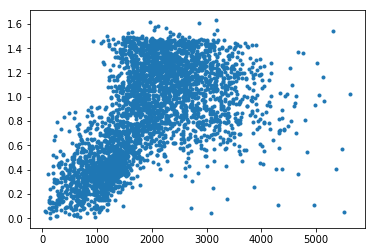

In [13]:
br_exts_sample = sample_br_extinction[np.where(sample_br_extinction)]
dist_ext_sample = sample_distance[np.where(sample_br_extinction)]

##
# no extinction fix
##
if (len(br_exts_sample) == 0.0):
    br_exts_sample = np.zeros(len(sample_br_extinction))
    dist_ext_sample = sample_distance
plt.plot(dist_ext_sample,br_exts_sample,'.')
avg_br_ext_sample = np.mean(br_exts_sample)


br_ext_list_sample = np.zeros(len(sample_br_extinction))
for i in range(len(sample_br_extinction)):
    ext = sample_br_extinction[i]
    if (type(ext) == np.float64):
        br_ext_list_sample[i] = (ext)
    else:
        br_ext_list_sample[i] = (avg_br_ext_sample)

174
14


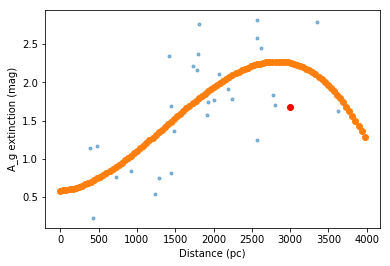

In [14]:
g_ext = a_g_extinction[np.where(a_g_extinction)]
dist_ext = distance[np.where(a_g_extinction)]
if (len(g_ext) == 0.0):
    g_ext = np.zeros(len(a_g_extinction))
    dist_ext = distance
plt.plot(dist_ext , g_ext ,'.', alpha = 0.5)
plt.plot(3000,np.mean(g_ext), 'ro', label = 'Sample Average')
fit_constants = np.polyfit(dist_ext, g_ext, 3)
fit_distance = np.linspace(0, max(distance) , 100)
fit = fit_constants[0]*fit_distance**3 + fit_constants[1]*fit_distance**2 + fit_constants[2]*fit_distance + fit_constants[3]
plt.plot(fit_distance, fit, 'o')
plt.xlabel('Distance (pc)')
plt.ylabel('A_g extinction (mag)')
g_ext_fit = fit_constants[0]*distance**3 + fit_constants[1]*distance**2 + fit_constants[2]*distance + fit_constants[3]
ext_list = np.zeros(len(a_g_extinction))
ext_near_snr_list = np.zeros(len(a_g_extinction[near_snr]))
for i in range(len(a_g_extinction)):
    ext = a_g_extinction[i]
    #dist = distance[i] #undo the # for a fit value
    if (type(ext) == np.float64):
        ext_list[i] = ext
    else:
        extinct = np.mean(g_ext_sample)
        #extinct = fit_constants[0]*dist**3 + fit_constants[1]*dist**2 + fit_constants[2]*dist + fit_constants[3]
        ext_list[i] = extinct
for i in range(len(a_g_extinction[near_snr])):
    ext_samp = a_g_extinction[near_snr][i]
    #dist = distance[i]
    if (type(ext_samp) == np.float64):
        ext_near_snr_list[i] = ext_samp
    else:
        extinct = np.mean(g_ext)
        #extinct = fit_constants[0]*dist**3 + fit_constants[1]*dist**2 + fit_constants[2]*dist + fit_constants[3]
        ext_near_snr_list[i] = extinct
print(len(ext_list))
print(len(ext_near_snr_list))

174
14


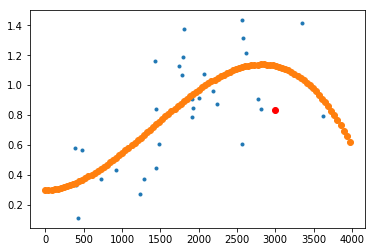

In [15]:
br_exts = br_extinction[np.where(br_extinction)]
dist_ext = distance[np.where(br_extinction)]

##
# no extinction fix
##
if (len(br_exts) == 0.0):
    br_exts = np.zeros(len(br_extinction))
    dist_ext = distance
plt.plot(dist_ext,br_exts,'.')
plt.plot(3000,np.mean(br_exts), 'ro')
avg_br_ext = np.mean(br_exts_sample)

br_fit_constants = np.polyfit(dist_ext, br_exts, 3)
br_fit_distance = np.linspace(0, max(distance) , 100)
br_fits = br_fit_constants[0]*br_fit_distance**3 + br_fit_constants[1]*br_fit_distance**2 + br_fit_constants[2]*br_fit_distance + br_fit_constants[3]
plt.plot(br_fit_distance, br_fits,'o')
br_ext_list = np.zeros(len(br_extinction))
br_ext_near_snr_list = np.zeros(len(br_extinction[near_snr]))
for i in range(len(br_extinction)):
    ext = br_extinction[i]
    #dist = distance[i]
    if (type(ext) == np.float64):
        br_ext_list[i] = (ext)
    else:
        br_ext_list[i] = (avg_br_ext)
        #extinct = br_fit_constants[0]*dist**3 + br_fit_constants[1]*dist**2 + br_fit_constants[2]*dist + br_fit_constants[3]
        #br_ext_list[i] = extinct
for i in range(len(br_extinction[near_snr])):
    ext_sample = br_extinction[near_snr][i]
    if (type(ext_sample) == np.float64):
        br_ext_near_snr_list[i] = (ext_sample)
    else:
        br_ext_near_snr_list[i] = (avg_br_ext)
               
print(len(br_ext_list))
print(len(br_ext_near_snr_list))

Right now I'm just using the average extinction from the sample set. I tried applying some fits to see if I could get better values but the spread of the extinctions can be quite large depending on the remnant. 

# Magnitude and Velocity Calculations

In [32]:
########
# Magnitude and Error Calculations
########

absolute_green_mag = g_mag_app + 5.0 - 5*np.log10(distance) - ext_list

brc = np.ma.MaskedArray.tolist(br_color)
corrected_br_color = np.zeros(len(brc))
for i in range(len(brc)):
    c_br = brc[i]
    c_br_ext = br_ext_list[i]
    if (type(c_br) == type(None)):
        corrected_br_color[i] = 0.0
    else:
        corrected_br_color[i] = c_br - c_br_ext
absolute_green_error = np.sqrt(((g_flux_error/g_flux)*1.07 )**2 + 
                               (parallax_error)**2)
apparent_green_error = g_flux_error/g_flux*1.07 
apparent_red_error = rp_flux_error/rp_flux*1.07 
apparent_blue_error = bp_flux_error/bp_flux*1.07 
bmag_error = []
rmag_error = []

for i in range(len(bp_flux)):
    c_r_flux = rp_flux[i]
    c_r_flux_error = rp_flux_error[i]
    c_b_flux = bp_flux[i]
    c_b_flux_error = bp_flux_error[i]
    if  (c_b_flux == 0.0):
        bmag_error.append(0.0)
    else:
        c_blue_error = 1.07*(c_b_flux_error/c_b_flux)
        bmag_error.append(c_blue_error)
   
    if (c_r_flux == 0.0):
        rmag_error.append(0.0)
    else:
        c_red_error = 1.07*(c_r_flux_error/c_r_flux)
        rmag_error.append(c_red_error)      
blue_red_error = np.zeros(len(br_color))
for i in range(len(bmag_error)):
    c2_b_error = bmag_error[i] 
    c2_r_error = rmag_error[i]
    c_br = np.sqrt(c2_b_error**2 + c2_r_error**2)
    blue_red_error[i] = c_br

In [33]:
absolute_green_mag_sample = sample_g_mag_app + 5.0 - 5*np.log10(sample_distance) - ext_list_sample

brc_sample = np.ma.MaskedArray.tolist(sample_br_color)
corrected_br_color_sample = np.zeros(len(brc_sample))
for i in range(len(brc_sample)):
    c_br = brc_sample[i]
    c_br_ext = br_ext_list_sample[i]
    if (type(c_br) == type(None)):
        corrected_br_color_sample[i] = 0.0
    else:
        corrected_br_color_sample[i] = c_br - c_br_ext
absolute_green_error_sample = np.sqrt(((sample_g_flux_error/sample_g_flux)*1.07 )**2 + 
                               (sample_parallax_error)**2)
apparent_green_error_sample = sample_g_flux_error/sample_g_flux*1.07 
apparent_red_error_sample = sample_rp_flux_error/sample_rp_flux*1.07 
apparent_blue_error_sample = sample_bp_flux_error/sample_bp_flux*1.07 
bmag_error_sample = []
rmag_error_sample = []

for i in range(len(sample_bp_flux)):
    c_r_flux = sample_rp_flux[i]
    c_r_flux_error = sample_rp_flux_error[i]
    c_b_flux = sample_bp_flux[i]
    c_b_flux_error = sample_bp_flux_error[i]
    if  (c_b_flux == 0.0):
        bmag_error_sample.append(0.0)
    else:
        c_blue_error = 1.07*(c_b_flux_error/c_b_flux)
        bmag_error_sample.append(c_blue_error)
   
    if (c_r_flux == 0.0):
        rmag_error_sample.append(0.0)
    else:
        c_red_error = 1.07*(c_r_flux_error/c_r_flux)
        rmag_error_sample.append(c_red_error)      
blue_red_error_sample = np.zeros(len(sample_br_color))
for i in range(len(bmag_error_sample)):
    c2_b_error = bmag_error_sample[i] 
    c2_r_error = rmag_error_sample[i]
    c_br = np.sqrt(c2_b_error**2 + c2_r_error**2)
    blue_red_error_sample[i] = c_br
    

In [35]:
gmag_sample = np.ma.MaskedArray.tolist(absolute_green_mag_sample)
gmag_sample = np.asarray(gmag_sample)
x = corrected_br_color_sample
y = gmag_sample
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

In [36]:
os.remove(snr_name + ' gaussian star magnitude printout.txt')
region = open(snr_name + ' gaussian star magnitude printout.txt', 'a+')
region.write('Absolute Green Mag (mag) , Corrected B-R (mag), PDF \n')
region.close
for i in range(len(x)):
    region = open(snr_name + ' gaussian star magnitude printout.txt', 'a+')
    region.write(str(x[i]) + ',' + str(y[i]) + ',' + str(z[i]) + '\n' )
    region.close()

In [37]:
ss = ascii.read(snr_name + ' gaussian star magnitude printout.txt')
xbr = ss[0][0:]
xg = ss[1][0:]
zpdf = ss[2][0:]

In [38]:
#######
# Star Motion Calculations
#######
ra_vel = pmra*distance*0.00476426752
dec_vel = pmdec*distance*0.00476426752 
#twod_vel_theta = 270. - np.arctan(dec_velocity/ra_velocity)*(180.0/np.pi)
twod_vel = np.sqrt( ra_vel**2 + dec_vel**2 )
threed_vel = np.sqrt( ra_vel**2 + dec_vel**2 + radial_vel**2 )

# Errors

ra_vel_error = np.sqrt(pmra**2 + parallax_error**2)
dec_vel_error =  np.sqrt(pmdec**2 + parallax_error**2)
twod_vel_error = np.sqrt(ra_vel_error**2 + dec_vel_error**2)
twod_vel_theta_error = np.arctan(dec_vel_error/ra_vel_error)*(180.0/np.pi)

#####
#Bulk Motion Subtraction
#####


pmra_sub = pmra - bulk_motion_pmra
pmdec_sub = pmdec - bulk_motion_pmdec
ra_vel_sub = distance*pmra_sub*0.00476426752
dec_vel_sub = distance*pmdec_sub*0.00476426752
sub_twod_vel = np.sqrt(ra_vel_sub**2 + dec_vel_sub**2)
sub_twod_vel_theta = 270 - np.arctan(pmdec_sub/pmra_sub)*(180/np.pi)

from astropy import units as u
pmra_error_unit = pmra_error * u.arcsec * 10**-3
pmra_error_deg_per_year =  pmra_error_unit.to(u.deg)
pmdec_error_unit = pmdec_error * u.arcsec * 10**-3
pmdec_error_deg_per_year =  pmdec_error_unit.to(u.deg)
pmra_error_deg = pmra_error_deg_per_year.value * snr_age
pmdec_error_deg = pmdec_error_deg_per_year.value * snr_age
##push up 
ra_error_unit = ra_error * u.arcsec * 10**-3
ra_error_deg =  ra_error_unit.to(u.deg)
ra_error_deg = ra_error_deg.value
dec_error_unit = dec_error * u.arcsec * 10**-3
dec_error_deg =  dec_error_unit.to(u.deg)
dec_error_deg = dec_error_deg.value
position_error_ra = np.sqrt(pmra_error_deg**2 + ra_error_deg**2)
position_error_dec = np.sqrt(pmdec_error_deg**2 + dec_error_deg**2)
print (ra_error_deg[0])
print("%.4e" % (pmra_error[0]* 10**-3 *(1/3600.0)* 5000.0))
print( "%.4e" % pmra_error_deg[0])

4.505962208966201e-08
4.0066e-04
3.2053e-04


In [39]:
stars = SkyCoord(ra=ra*u.deg, dec= dec*u.deg, 
                 distance = distance*u.pc,
                 pm_ra_cosdec =  pmra_sub*u.mas/u.yr, 
                 pm_dec = pmdec_sub* u.mas/u.yr, 
                 radial_velocity = 0.0*u.km/u.s)
pt_pos = stars.apply_space_motion(dt=-snr_age*u.yr)
pt_dist_to_center = pt_pos.separation(snr_coords).deg
#pt_dist_to_center_2 = pt_pos.separation(snr_coords_2).deg
#stars_test = SkyCoord(ra=ra*u.deg, dec= dec*u.deg, 
#                      distance = distance*u.pc,
#                      pm_ra_cosdec =  pmra*u.mas/u.yr, 
#                      pm_dec = pmdec* u.mas/u.yr, 
#                      radial_velocity = 0.0*u.km/u.s)
#pt_pos_test = stars_test.apply_space_motion(dt=-5000*u.yr)

In [40]:
###
# Data Cuts
##
no_cut = np.where(distance == distance)
near_snr = np.where((distance >= snr_distance_low_estimate) & (distance <= snr_distance_high_estimate))
fast_stars = np.where(sub_twod_vel >= 2.0*np.std(sub_twod_vel))

##
# Choose Which Cut
##
cuts =  no_cut[0]
#cuts = near_snr[0]
#cuts = np.intersect1d(near_snr[0],fast_stars[0])
dist_rank_index = pt_dist_to_center[cuts].argsort()
print(dist_rank_index[0:10])

[135 110 149 108 172  77 117 133  64  16]


# Sample CMD Analysis

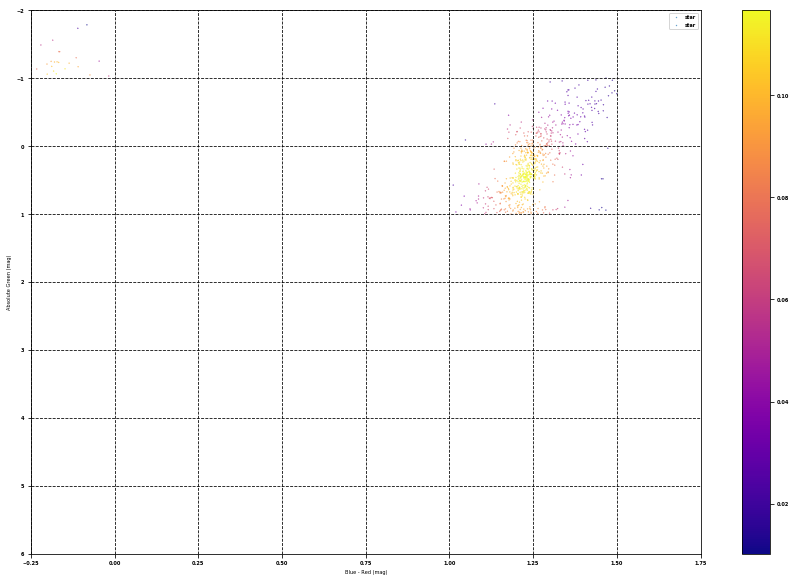

In [41]:
box_1 = np.where((xbr > -0.25) & (xbr < 0.0) & (xg < -1) &  (xg > -2))
box_2 = np.where((xbr > 1.0) & (xbr < 1.50) & (xg < 1) &  (xg >-1))
plt.figure(figsize=(15,10))
#grid = plt.GridSpec(1,8)
#plt.subplot(211)
plt.subplot()
plt.scatter(xbr[box_1], xg[box_1], c = zpdf[box_1] , s=.1, cmap = 'plasma' , label = 'star', alpha = 1)
plt.scatter(xbr[box_2], xg[box_2], c = zpdf[box_2] , s=.1, cmap = 'plasma' , label = 'star', alpha = 1)
plt.grid(color='black', ls='dashed')
plt.xlabel('Blue - Red (mag)')
plt.ylabel(  'Absolute Green (mag)')
plt.xlim(-0.25,1.75)
plt.legend()
plt.ylim(-2,6)
plt.gca().invert_yaxis()
plt.colorbar()

In [42]:
nx = 18
ny = 18

box_x_min = min(xbr)
box_x_max = max(xbr)

box_y_min = min(xg)
box_y_max = max(xg)

box_x_min = -0.25
box_x_max = 2.5

box_y_min = -3
box_y_max = 13

box_x_scale = (box_x_max - box_x_min)/nx
box_y_scale = (box_y_max - box_y_min)/ny

big_box = np.where((xbr > box_x_min) & (xbr < box_x_max) & (xg < box_y_max) &  (xg > box_y_min))
#
#total_counts = len(big_box[0])
total_counts = len(xg)

box_x_lims = np.linspace(box_x_min, box_x_max, nx+1)
box_y_lims = np.linspace(box_y_min, box_y_max, ny+1)
x_box_grid, y_box_grid = np.meshgrid(box_x_lims,box_y_lims)

percent_grid_errors = []
percent_grid = []
counts_grid = []
for i in range(len(box_y_lims)):
    blim_ymin = box_y_lims[i]
    blim_ystep = blim_ymin + box_y_scale
    if (blim_ystep > max(box_y_lims)):
        break
    prob_list =[]
    prob_list_errors = []
    countslist = []
    for i in range(len(box_x_lims)):
        blim_xmin = box_x_lims[i]
        blim_xstep = blim_xmin + box_x_scale
        if (blim_xstep > max(box_x_lims)):
            break
        box = np.where((xbr > blim_xmin) & (xbr < blim_xstep) & (xg < blim_ystep) &  (xg > blim_ymin))[0]
        
        #counts_prob = (len(box))
        countsforlist = len(box)
        counts_prob = (len(box)/total_counts)*100
        counts_prob_error = (np.sqrt(len(box))/total_counts)*100
        prob_list.append(float('%.3f'%counts_prob))
        prob_list_errors.append(float('%.5f'%counts_prob_error))
        countslist.append(countsforlist)
    percent_grid.append(prob_list)
    percent_grid_errors.append(prob_list_errors)
    counts_grid.append(countslist)
len(counts_grid[0])

18

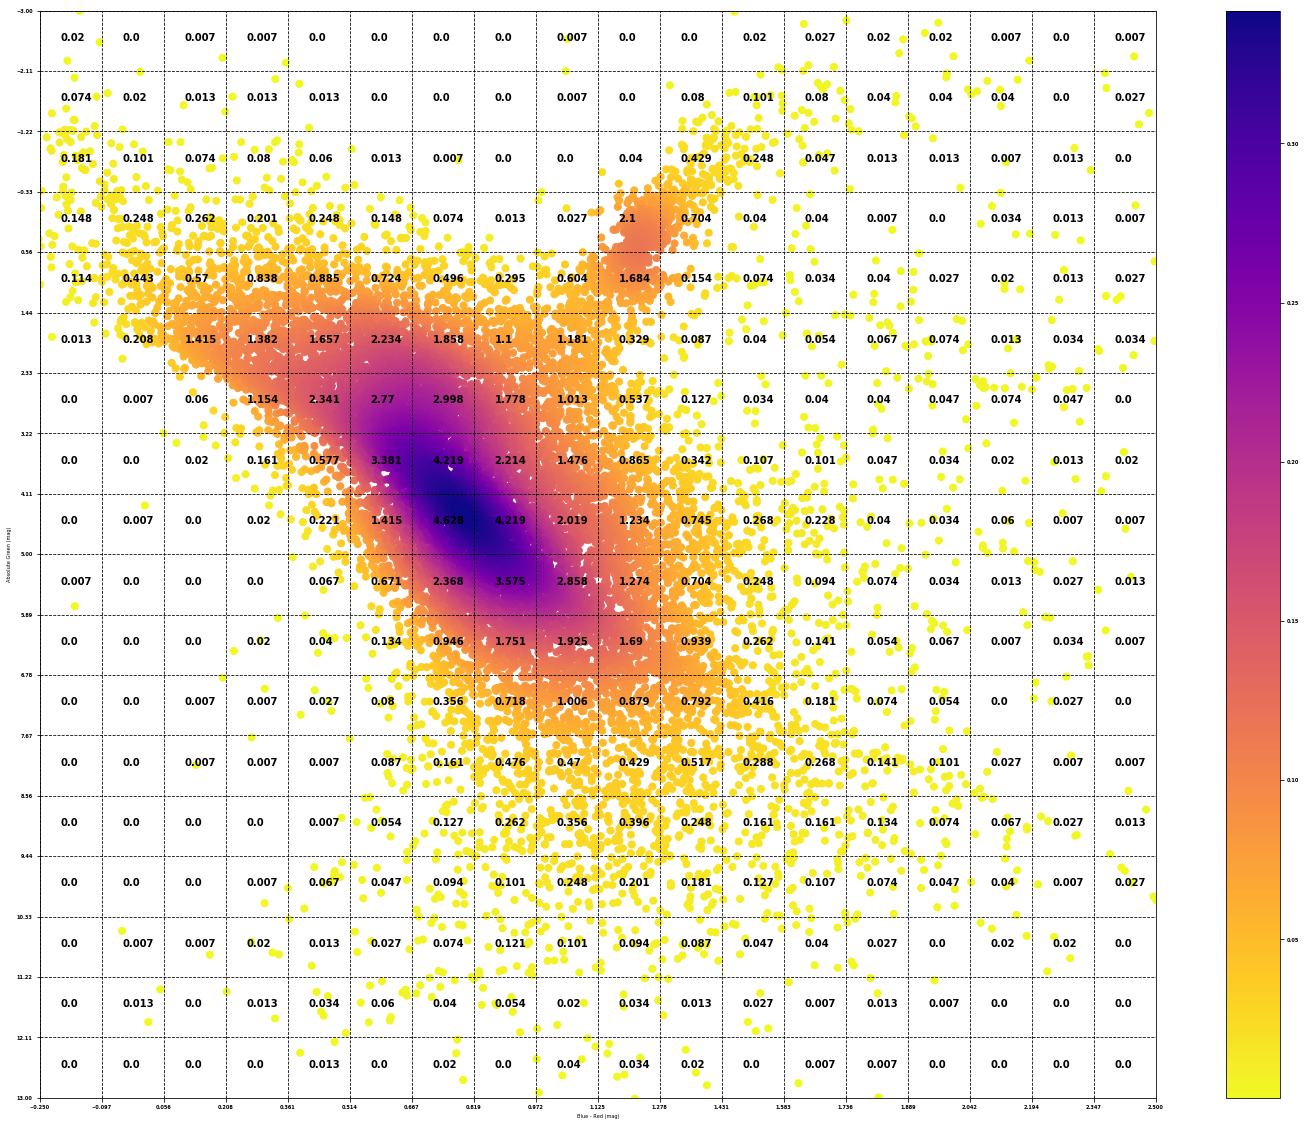

In [43]:
plt.figure(figsize=(25,20))
plt.subplot()
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 5}
axis_font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 5}
matplotlib.rc('font', **font)
plt.grid(color='black', ls='dashed')
plt.xlabel('Blue - Red (mag)')
plt.ylabel(  'Absolute Green (mag)')
plt.xlim(box_x_min,box_x_max)
#plt.legend()
plt.ylim(box_y_min,box_y_max)
plt.gca().invert_yaxis()
plt.xticks(box_x_lims)
plt.yticks(box_y_lims)
plt.scatter(xbr, xg, c = zpdf , s=50, cmap = 'plasma_r' , label = 'star')
corrected_br_color_cut = corrected_br_color[cuts]
absolute_green_mag_cut = absolute_green_mag[cuts]
#plt.plot(corrected_br_color_cut,absolute_green_mag_cut,'g*',alpha = 0.5)
#plt.plot(corrected_br_color_cut[282],absolute_green_mag_cut[282],'b*')
for i in range(len(percent_grid)):
    pl = percent_grid[i]
    blim_ymin = box_y_lims[i]
    blim_ystep = blim_ymin + box_y_scale
    pspoty = (blim_ystep + blim_ymin)/2
    if (blim_ystep > max(box_y_lims)):
        break
    for i , txt in enumerate(pl):
        blim_xmin = box_x_lims[i]
        blim_xstep = blim_xmin + box_x_scale
        pspotx = (blim_xstep + blim_xmin)/2-0.025
        if (blim_xstep > max(box_x_lims)):
            break
        plt.annotate(txt, xy = (pspotx, pspoty), 
                     xytext = (pspotx, pspoty), 
                     size = 10, color ='k' )
plt.colorbar()
plt.savefig(str(snr_name) + ' ' + ' ' + str(nx)+'x'+str(ny)+' prob cmd.jpeg')

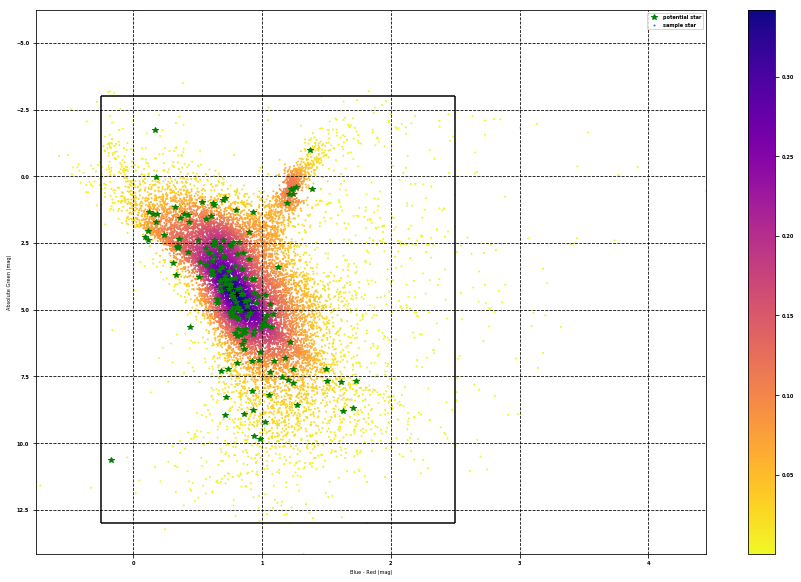

In [44]:
plt.figure(figsize=(15,10))
#grid = plt.GridSpec(1,8)
#plt.subplot(211)
ax = plt.subplot()
plt.scatter(xbr, xg, c = zpdf , s=1, cmap = 'plasma_r' , label = 'sample star')
plt.plot(corrected_br_color_cut,absolute_green_mag_cut,'g*',alpha = 1.0, label = 'potential star')
plt.colorbar()
plt.grid(color='black', ls='dashed')
plt.xlabel('Blue - Red (mag)')
plt.ylabel(  'Absolute Green (mag)')
plt.hlines(box_y_min, box_x_min, box_x_max)
plt.hlines(box_y_max, box_x_min, box_x_max)
plt.vlines(box_x_min, box_y_min, box_y_max)
plt.vlines(box_x_max, box_y_min, box_y_max)
plt.xlim(min(xbr),max(xbr))
plt.legend()
plt.ylim(min(xg),max(xg))
plt.plot(xbr[-1],xg[-1] , 'k+')
plt.gca().invert_yaxis()
plt.tight_layout
plt.savefig(snr_name + ' boxed sample.jpeg')

In [ ]:
np.where(absolute_green_mag[0]<box_y_lims)

In [ ]:
print(absolute_green_mag[0])
print(box_y_lims)
print(np.where(absolute_green_mag[0]<box_y_lims[1:-1]))
print(np.where(absolute_green_mag[0]>box_y_lims[1:-1]))

In [ ]:
print(corrected_br_color[0])
print(box_x_lims)
print(np.where(corrected_br_color[0]<box_x_lims))
print(np.where(corrected_br_color[0]>box_x_lims))

In [ ]:
t = 385
xindex = np.where(corrected_br_color[t]<box_x_lims[1:nx+1])[0]
yindex = np.where(absolute_green_mag[t]<box_y_lims[1:ny+1])[0]
print(xindex,yindex)

In [ ]:
len(np.where(absolute_green_mag[t]<box_y_lims[1:ny+1])[0])

In [ ]:
cmdpercents

In [45]:
cmd_percentages = []
cmd_percentage_errors = []
for i in range(len(absolute_green_mag)):
    green_mag = absolute_green_mag[i]
    br = corrected_br_color[i]
    #if ((len(np.where(br<box_x_lims)[0]) == 0) or (len(np.where(br<box_x_lims)[0]) == 0)):
    xindex = np.where(br<box_x_lims[1:nx+1])[0]
    yindex = np.where(green_mag<box_y_lims[1:nx+1])[0]
    if ((len(yindex)==0) or (len(xindex)==0)): 
        percent_value = (1-(len(big_box[0])/total_counts))*100
        percent_value_error = (np.sqrt(total_counts - len(big_box[0]))/total_counts)*100
    else:
        percent_value = percent_grid[yindex[0]][xindex[0]]
        percent_value_error = percent_grid_errors[yindex[0]][xindex[0]]
    cmd_percentages.append(percent_value)
    cmd_percentage_errors.append(percent_value_error)
cmdpercents = np.asarray(cmd_percentages)
cmdpercenterrors = np.asarray(cmd_percentage_errors)

# Velocity Sample Data Analysis

In [46]:
#os.chdir('D:\\Documents\Research\Supernova Remnant Data\G299.2-2.9')
#
#######
# Star Motion Calculations
#######
# Errors

sample_ra_vel_error = np.sqrt(sample_pmra**2 + sample_parallax_error**2)
sample_dec_vel_error =  np.sqrt(sample_pmdec**2 + sample_parallax_error**2)
sample_twod_vel_error = np.sqrt(sample_ra_vel_error**2 + sample_dec_vel_error**2)
sample_twod_vel_theta_error = np.arctan(sample_dec_vel_error/sample_ra_vel_error)*(180.0/np.pi)

#####
#Bulk Motion Subtraction
#####

sample_pmra_median = np.median(sample_pmra)
sample_pmdec_median = np.median(sample_pmdec)
sample_pmra_sub = sample_pmra - sample_pmra_median
sample_pmdec_sub = sample_pmdec - sample_pmdec_median
sample_ra_vel_sub = sample_distance*sample_pmra_sub*0.00476426752
sample_dec_vel_sub = sample_distance*sample_pmdec_sub*0.00476426752
sample_sub_twod_vel = np.sqrt(sample_ra_vel_sub**2 + sample_dec_vel_sub**2)
sample_sub_twod_vel_theta = 270 - np.arctan(sample_pmdec_sub/sample_pmra_sub)*(180/np.pi)

In [47]:
h = 0.01
def velocity_cdf(x):
    total = len(sample_sub_twod_vel)
    below = len(np.where(sample_sub_twod_vel < x)[0])
    return below/total
def fprime(x):
    return (velocity_cdf(x+h)-velocity_cdf(x))/h
def gaussian(velocity, velocity_error):
    return 1./(np.sqrt(2.*np.pi)*velocity_error) * np.exp(-0.5 * (((vspace-velocity)/(velocity_error))**2))
v_cdf = []
v_cdf_prime = []
vspace = np.linspace(0,1000,1001)
for i in range(len(vspace)):
    vi = vspace[i]
    vcdf = velocity_cdf(vi)
    v_cdf.append(vcdf)
for i in range(len(vspace)):
    vi = vspace[i]
    vcdfp = fprime(vi)
    v_cdf_prime.append(vcdfp)
v_cdf_gradient = np.gradient(v_cdf)

Trapz on np.gradient: 1.0
Trapz on fprime(velocity_cdf): 1.0732492621411067
Quads on fprime(velocity_cdf): (0.9393820814168616, 0.19692039285771734)


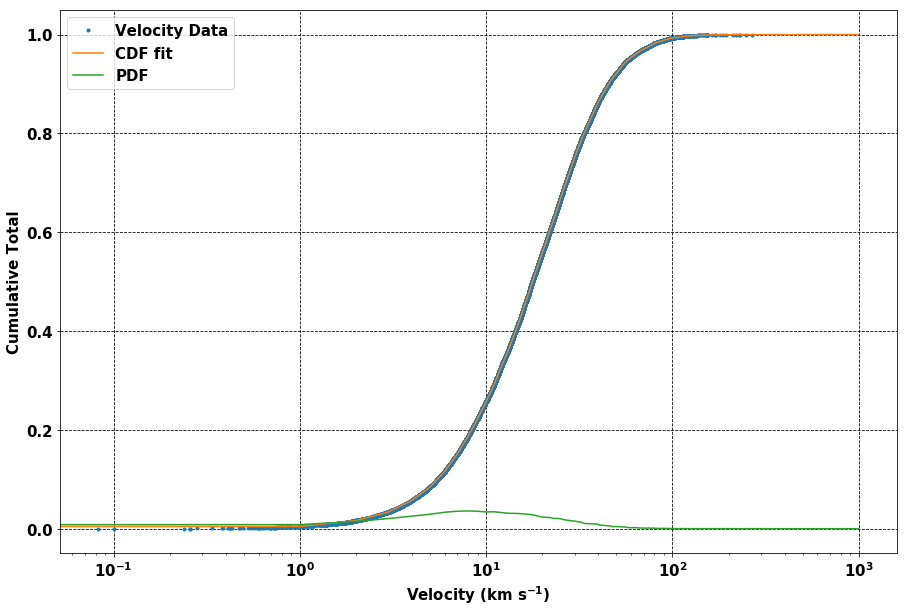

In [48]:
v = np.sort(sample_sub_twod_vel)
y = np.arange(1,len(sample_sub_twod_vel)+1)/ len(sample_sub_twod_vel)
plt.figure(figsize=(15,10))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
axis_font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)
plt.grid(color='black', ls='dashed')
plt.semilogx(v,y,marker='.',linestyle='none', label = 'Velocity Data')
plt.semilogx(vspace,v_cdf, label = 'CDF fit')
plt.semilogx(vspace, np.gradient(v_cdf),label= 'PDF')
plt.xlabel('Velocity (km s'+r'$^{-1}$'+')',**axis_font)
plt.ylabel('Cumulative Total',**axis_font)
plt.xticks()
plt.legend()
print('Trapz on np.gradient:', scipy.integrate.trapz(np.gradient(v_cdf)))
print('Trapz on fprime(velocity_cdf):', scipy.integrate.trapz(v_cdf_prime))
print('Quads on fprime(velocity_cdf):',scipy.integrate.quad(fprime, 0, np.inf))
plt.savefig('velocity_cdf.jpeg')

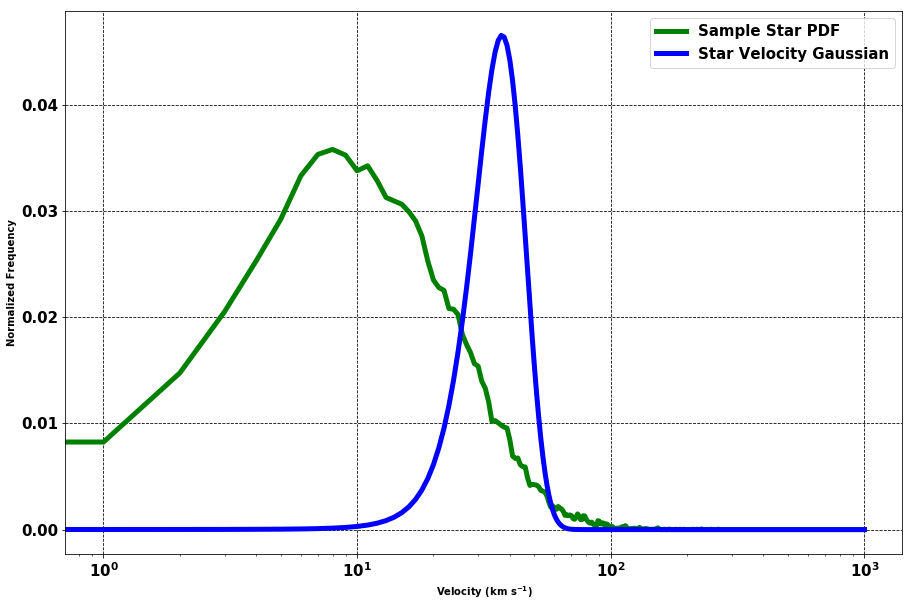

In [49]:
#print('Trapz on combined dist:', scipy.integrate.trapz(combined_dist))
#print('Quads on fprime(velocity_cdf):',scipy.integrate.quad(fprime, 0, np.inf))
gaussian_dist = gaussian(sub_twod_vel[cuts][dist_rank_index[0]], twod_vel_error[cuts][dist_rank_index[0]])
#gaussian_dist = gaussian(sub_twod_vel[cuts][metric_rank_index[0]], twod_vel_error[cuts][metric_rank_index[0]])
plt.figure(figsize=(15,10))
plt.subplot()
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}
axis_font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}
# Formatting

plt.xlabel('Velocity (km s'+r'$^{-1}$'+')',**axis_font)
plt.ylabel('Normalized Frequency',**axis_font)
plt.grid(color='black', ls='dashed')
plt.semilogx(vspace, np.gradient(v_cdf), lw=5, color='green', label = 'Sample Star PDF')
plt.semilogx(vspace, gaussian_dist, lw = 5, color = 'blue', label = 'Star Velocity Gaussian')
#plt.semilogx(vspace, combined_dist, lw = 5, color = 'orange', label = 'Combined Distribution')

plt.legend()
#plt.savefig('maxwellian and gaussian plot.jpeg')

0.010630639531543619


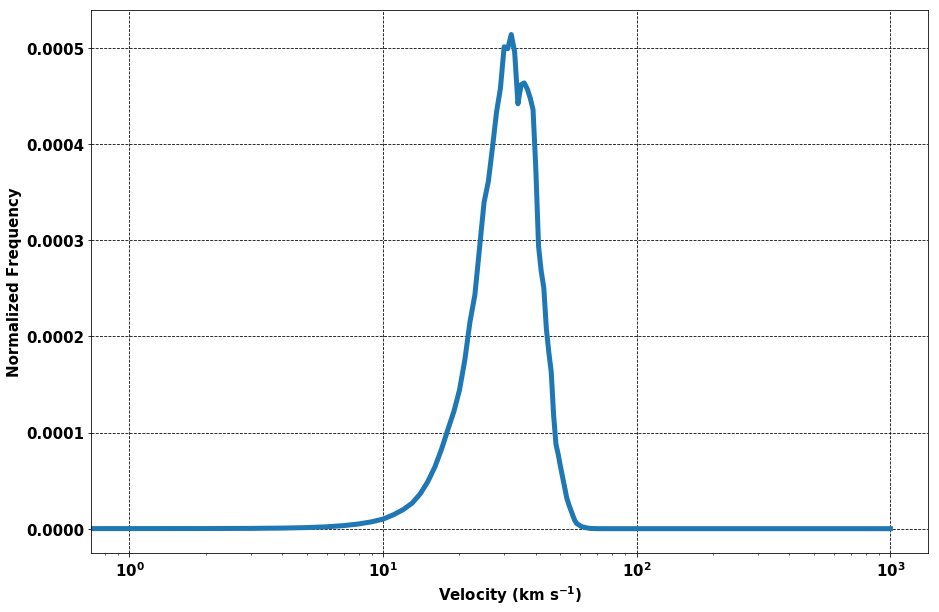

In [50]:
combined_dist = gaussian_dist*v_cdf_gradient
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
axis_font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)
print(scipy.integrate.trapz(combined_dist))
plt.figure(figsize=(15,10))
plt.subplot()
plt.xlabel('Velocity (km s'+r'$^{-1}$'+')',**axis_font)
plt.ylabel('Normalized Frequency',**axis_font)
plt.grid(color='black', ls='dashed')
plt.semilogx(vspace, combined_dist, lw = 5)

In [51]:
star_velocity_weights = []
for i in range(len(sub_twod_vel)):
    star_vel = sub_twod_vel[i]
    star_vel_error = twod_vel_error[i]
    star_velocity_gaussian = gaussian(star_vel, star_vel_error)
    star_gaussian_interpolated = scipy.interpolate.interp1d(vspace, star_velocity_gaussian, fill_value="extrapolate")
    star_velocity_gauss = star_gaussian_interpolated(vspace)
    star_combined_function = star_velocity_gauss * v_cdf_gradient
    star_weight = scipy.integrate.trapz(star_combined_function)
    star_velocity_weights.append(star_weight)
star_velocity_weights = np.asarray(star_velocity_weights)
print(star_velocity_weights[cuts][dist_rank_index[0:15]])
#star_velocity_weights = []
#for i in range(len(sub_twod_vel)):
#    star_vel = sub_twod_vel[i]
#    star_vel_error = twod_vel_error[i]
#    star_velocity_gaussian = gaussian(star_vel, star_vel_error)
#    star_combined_function = star_velocity_gaussian * v_cdf_gradient
#    star_weight = scipy.integrate.trapz(star_combined_function)
#    star_velocity_weights.append(star_weight)
#star_velocity_weights = np.asarray(star_velocity_weights)
#print(star_velocity_weights[cuts][dist_rank_index[0:15]])

[0.01063064 0.02880481 0.02532671 0.03347591 0.01075799 0.01128349
 0.01702946 0.03493614 0.02330515 0.02776817 0.00581387 0.01317972
 0.03044931 0.03167179 0.03272198]


# Metrics

This is where I take the different properties of the stars (CMD rarity, velocity, seperation from center at explosion, and distance from earth) and combine them into one score. 

In [52]:
star_velocity_metric = 1/(1*star_velocity_weights)
mcmd = 100/(cmdpercents)
distance_metric_low_error = 1-(np.erf(((np.abs(snr_dist - distance)/np.sqrt((low_snr_dist**2)+(low_dist_err**2)))/np.sqrt(2)))*1)
distance_metric_high_error = 1-(np.erf(((np.abs(snr_dist - distance)/np.sqrt((high_snr_dist**2)+(high_dist_err**2)))/np.sqrt(2)))*1)
distance_metric = 1-(np.erf(((np.abs(snr_dist - distance)/np.sqrt((3000**2)+(high_dist_err**2)+(low_dist_err**2)))/np.sqrt(2)))*1)
distance_metric = np.asarray(distance_metric)
distance_metric_avg = []
for i in range(len(distance_metric_high_error)):
    mdle = distance_metric_low_error[i]
    mdhe = distance_metric_high_error[i]
    mdavg = np.mean([mdle,mdhe])
    distance_metric_avg.append(mdavg)
distance_metric_avg = np.asarray(distance_metric_avg)
print(distance_metric_avg[cuts][dist_rank_index][0:10])
print(distance_metric[cuts][dist_rank_index][0:10])

[0.0592093  0.22329906 0.02040775 0.43785709 0.04431833 0.15510591
 0.24400553 0.13112611 0.23338808 0.09855569]
[0.20802297 0.41378279 0.12206122 0.60343832 0.17968984 0.34014706
 0.43696492 0.31309949 0.42629797 0.27071949]


In [53]:
def center_weight_test(ra,ra_error,dec,dec_error):
    ra_weight = ((snr_coords.ra.deg-ra)**2)/((snr_center_error_ra**2)+(ra_error**2))
    dec_weight = ((snr_coords.dec.deg-dec)**2)/((snr_center_error_dec**2)+(dec_error**2))
    return np.sqrt(ra_weight + dec_weight)
center_weight = np.erf(center_weight_test(pt_pos.ra.deg, position_error_ra, pt_pos.dec.deg, position_error_dec)/np.sqrt(2))
center_metric = 1 - center_weight
print(center_weight[cuts][dist_rank_index][0:10])

[0.03544691 0.09330166 0.16624611 0.08818263 0.17667951 0.11992338
 0.20029128 0.19061464 0.14410746 0.13801291]


In [54]:
nt = 500000
random_ra = np.random.uniform(low = min(contour_ra-0.07), high = max(contour_ra+0.07), size = (nt,))
random_ra_error = np.random.uniform(low = min(pmra_error_deg), high = max(pmra_error_deg), size = (nt,))
random_dec = np.random.uniform(low = min(contour_dec-0.07), high = max(contour_dec+0.07), size = (nt,))
random_dec_error = np.random.uniform(low = min(pmdec_error_deg), high = max(pmdec_error_deg), size = (nt,))
weights = center_weight_test(random_ra,random_ra_error,random_dec,random_dec_error)
weights_sorting = weights.argsort()
weights = weights[weights_sorting]
random_ra = random_ra[weights_sorting]
random_dec = random_dec[weights_sorting]
weighted = np.erf(weights/np.sqrt(2))

In [55]:
mtotal = []
for i in range(len(absolute_green_mag)):
    total_metric = ((mcmd[i]*star_velocity_metric[i])*distance_metric_avg[i]*center_metric[i])
    mtotal.append(total_metric)
mtotal = np.asarray(mtotal)
metric_rank_index = mtotal[cuts].argsort()[::-1]
print(metric_rank_index[0:20])

[149 108  99 128 130 162 158  14 117  18 129  94  63  33 119 163 152  76
  29  64]


In [ ]:
cmdpercents[cuts][metric_rank_index[0]]

# Plots

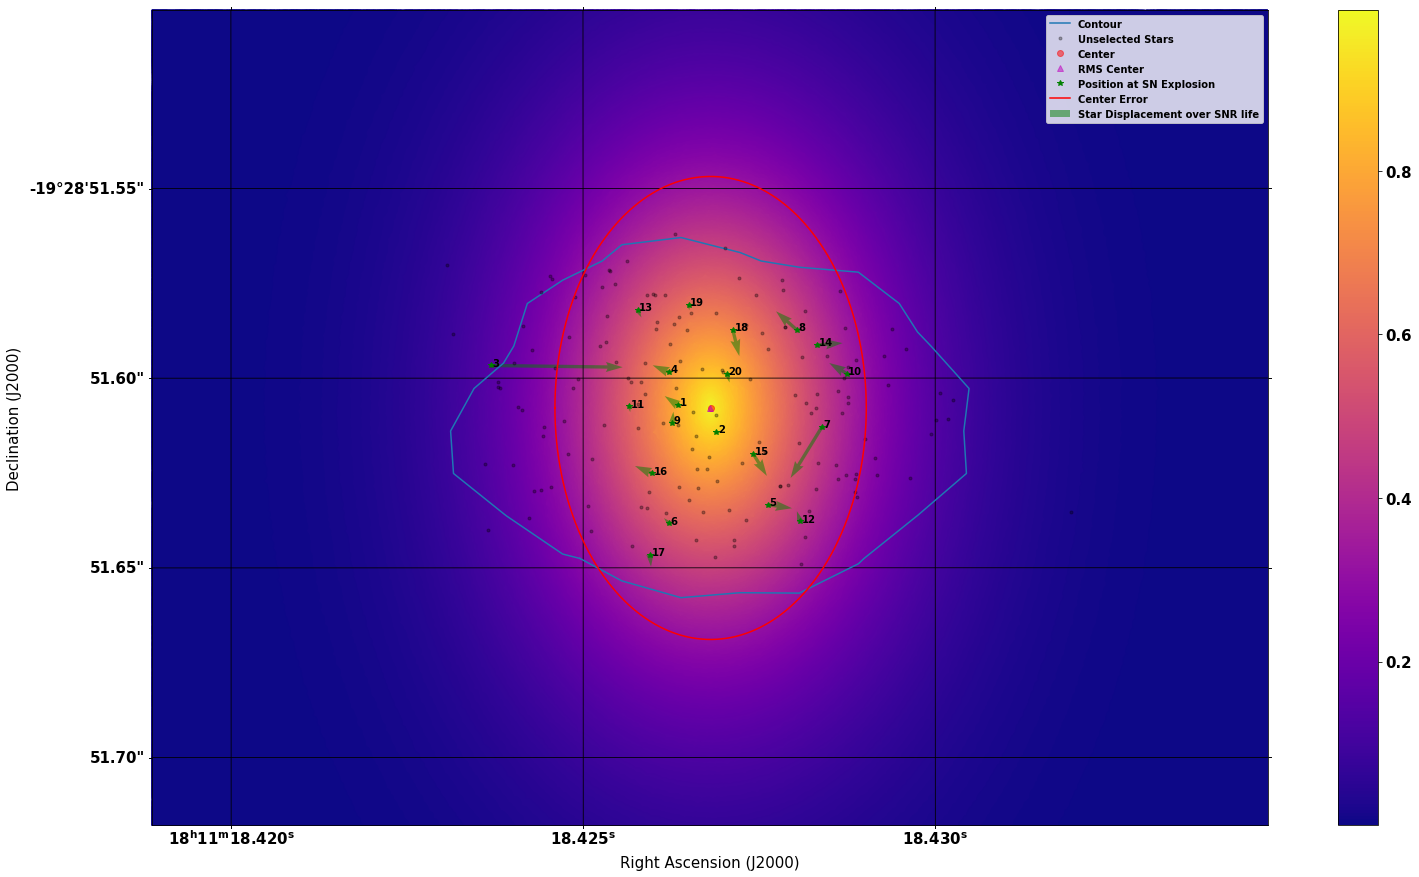

In [56]:
# Choose a set of stars
nstart = 1
nend = 20
nstep = nend - nstart + 1
n = np.linspace(nstart,nend,nstep)
###
# Star Position Plots
###
##
#Plot Parameters
##
xlim = 1.0*snr_radius_degrees.value*2
ylim = 1.0*snr_radius_degrees.value
plt.figure(figsize=(25,15))
ax = plt.subplot(projection=wcs)
ax.grid(color='black', ls='solid')
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')
#plt.xlim(snr_coords.ra.deg - xlim, snr_coords.ra.deg + xlim)
#plt.ylim(snr_coords.dec.deg - ylim-0.008, snr_coords.dec.deg + ylim+0.008)
plt.xlim(min(contour_ra)-0.05,max(contour_ra)+0.05)
plt.ylim(min(contour_dec)-0.05,max(contour_dec)+0.05)
plt.gca().invert_xaxis()
plt.plot(contour_ra,contour_dec , label ='Contour')
#Choose which center
plot_ra = snr_coords.ra.deg
plot_dec = snr_coords.dec.deg
plot_ra_rms = snr_coords_rms.ra.deg
plot_dec_rms = snr_coords_rms.dec.deg
error_ra = snr_center_error_ra
error_dec = snr_center_error_dec
#plot_ra = snr_coords_2.ra.deg
#plot_dec = snr_coords_2.dec.deg
#plot_ra_rms = snr_coords_rms_2.ra.deg
#plot_dec_rms = snr_coords_rms_2.dec.deg
#error_ra = snr_center_error_ra_2
#error_dec = snr_center_error_dec_2
##
# Cutting the data used
##
past_pos_ra = pt_pos.ra.deg[cuts]
past_pos_dec = pt_pos.dec.deg[cuts]
pmra_error_deg_cut = pmra_error_deg[cuts]
pmdec_error_deg_cut = pmdec_error_deg[cuts]
stars_ra = stars.ra.deg[cuts]
stars_dec = stars.dec.deg[cuts]
plt.scatter(random_ra, random_dec, c = (1-weighted), cmap = 'plasma', s = 60, alpha = 1)
plt.colorbar()
plt.plot(past_pos_ra,past_pos_dec, 'k.', alpha =0.3, label = 'Unselected Stars')

#plt.plot(past_pos_ra[dist_rank_index],past_pos_dec[dist_rank_index], 'y.', alpha =0.2, label = 'Unselected Stars')
#plt.plot(past_pos_ra[dist_rank_index],past_pos_dec[dist_rank_index], 'r.', alpha =0.2, label = 'Unselected Stars')
#plt.plot(past_pos_ra[dist_rank_index],past_pos_dec[dist_rank_index], 'b.', alpha =0.2, label = 'Unselected Stars')
#plt.plot(past_pos_ra[dist_rank_index],past_pos_dec[dist_rank_index], 'm.', alpha =0.2, label = 'Unselected Stars')

plt.plot(plot_ra,plot_dec, 'ro', alpha =0.5 ,label= 'Center')
plt.plot(plot_ra_rms,plot_dec_rms, 'm^', alpha = 0.5 , label = 'RMS Center')
plt.plot(past_pos_ra[metric_rank_index[0:nend]],past_pos_dec[metric_rank_index[0:nend]],'g*',alpha = 1 , label='Position at SN Explosion')

#plt.plot(pt_pos.ra.deg[cuts],pt_pos.dec.deg[cuts],'b.',alpha = 0.5)

plt.quiver(past_pos_ra[metric_rank_index[0:nend]],past_pos_dec[metric_rank_index[0:nend]], 
           (stars_ra[metric_rank_index[0:nend]] - past_pos_ra[metric_rank_index[0:nend]]) ,
           (stars_dec[metric_rank_index[0:nend]] - past_pos_dec[metric_rank_index[0:nend]]) , 
           angles='xy', scale_units='xy', 
           color = 'g', scale=1, 
           alpha = 0.5, width = 0.003, label = 'Star Displacement over SNR life')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}
axis_font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)
t = np.linspace(0,2*np.pi, 1000)
#Error Elipse
plt.plot(plot_ra+error_ra*np.cos(t),
         plot_dec+error_dec*np.sin(t), 'r-', alpha =1 , label = 'Center Error')
#PMRA/DEC Errors
#for i in range(nend):  
#    u = past_pos_ra[metric_rank_index[i]]
#    v = past_pos_dec[metric_rank_index[i]]
#    a = pmra_error_deg_cut[metric_rank_index[i]]
#    b = pmdec_error_deg_cut[metric_rank_index[i]]
#    plt.plot( u+a*np.cos(t) , v+b*np.sin(t) , 'k-' )

for i, txt in enumerate(n):
    plt.annotate(int(txt), xy = (past_pos_ra[metric_rank_index[i]],
                                 past_pos_dec[metric_rank_index[i]]),
                 xytext = (past_pos_ra[metric_rank_index[i]] - 0.00025, 
                           past_pos_dec[metric_rank_index[i]] - 0.0001), 
                 size = 10)

plt.legend(loc=1)#'top right')
plt.savefig(snr_name + ' past_position.jpeg')

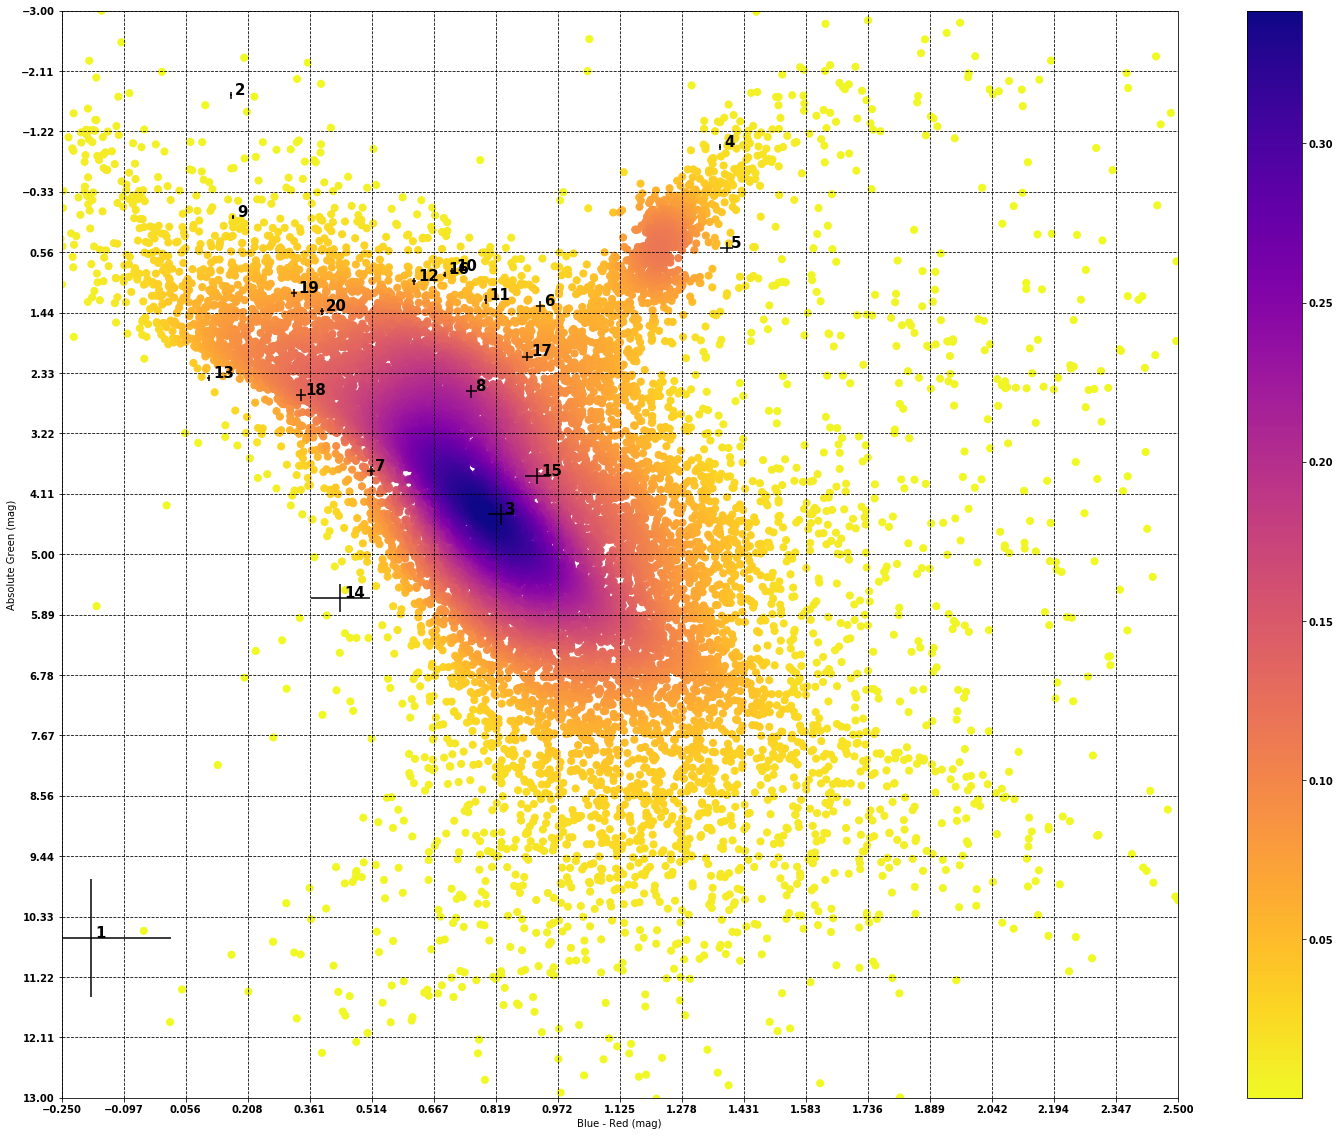

In [57]:
plt.figure(figsize=(25,20))
#grid = plt.GridSpec(1,8)
#plt.subplot(211)
plt.subplot()
plt.scatter(xbr, xg, c = zpdf , s=50, cmap = 'plasma_r' , label = 'star', alpha = 1)
plt.grid(color='black', ls='dashed')
plt.xlabel('Blue - Red (mag)')
plt.ylabel(  'Absolute Green (mag)')
plt.xlim(box_x_min,box_x_max)
#plt.legend()
plt.ylim(box_y_min,box_y_max)
plt.gca().invert_yaxis()
plt.xticks(box_x_lims)
plt.yticks(box_y_lims)
plt.colorbar()
corrected_br_color_cut = corrected_br_color[cuts]
absolute_green_mag_cut = absolute_green_mag[cuts]
blue_red_error_cut = blue_red_error[cuts]
absolute_green_error_cut = absolute_green_error[cuts]
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
axis_font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)
for i in range(len(n)):
    n_index = int(n[i] - 1.0)
    plot_color = corrected_br_color_cut[metric_rank_index[n_index]]
    plot_mag = absolute_green_mag_cut[metric_rank_index[n_index]]
    plot_color_error = blue_red_error_cut[metric_rank_index[n_index]]
    plot_mag_error = absolute_green_error_cut[metric_rank_index[n_index]]
    plt.errorbar(plot_color, plot_mag, 
                     xerr = plot_color_error, 
                     yerr = plot_mag_error, color ='k')
for i, txt in enumerate(n):
    n_index = int(n[i] - 1.0)
    plot_color = corrected_br_color_cut[metric_rank_index[n_index]]
    plot_mag = absolute_green_mag_cut[metric_rank_index[n_index]]
    plot_color_error = blue_red_error_cut[metric_rank_index[n_index]]
    plot_mag_error = absolute_green_error_cut[metric_rank_index[n_index]]
    plt.annotate(int(txt), 
                     xy = (corrected_br_color_cut[metric_rank_index[n_index]], 
                           absolute_green_mag_cut[metric_rank_index[n_index]]) , 
                     xytext = (corrected_br_color_cut[metric_rank_index[n_index]]+0.01,
                               absolute_green_mag_cut[metric_rank_index[n_index]]-0.01),
                     size = 15.0, color='k')
plt.tight_layout
plt.savefig(snr_name + ' ' + str(nx)+'x'+str(ny)+' cmd with potential stars.jpeg')

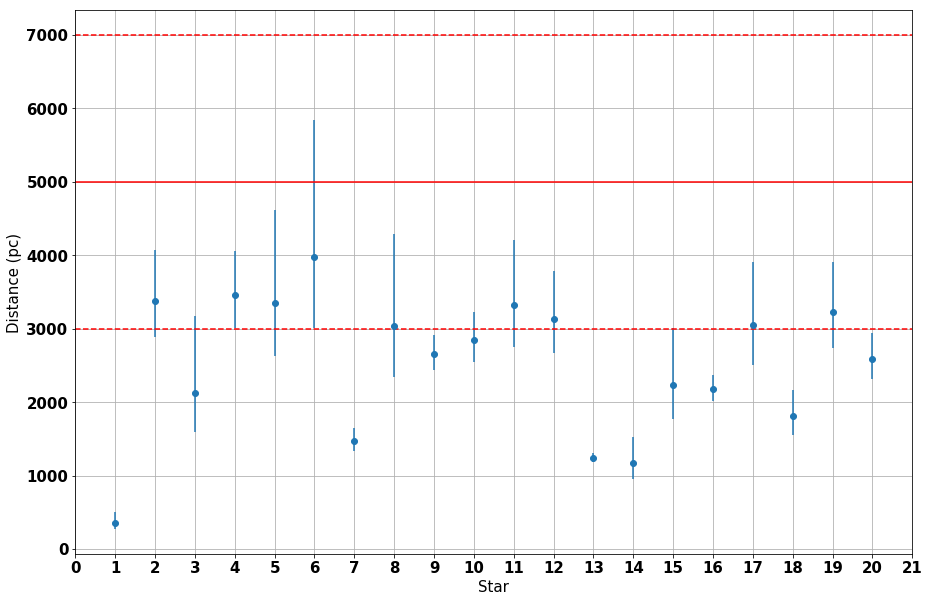

In [58]:
nstart = 1
nend = 20
nstep = nend - nstart + 1
n = np.linspace(nstart,nend,nstep)
low_dist_err = distance - distance_error_low
high_dist_err = distance_error_high - distance
low_dist_err_cut = low_dist_err[cuts]
high_dist_err_cut = high_dist_err[cuts]
distance_cut = distance[cuts]
plt.figure(figsize=(15,10))
plt.errorbar(n, distance_cut[metric_rank_index[nstart - 1:nend]], 
             yerr = [low_dist_err_cut[[metric_rank_index[nstart - 1:nend]]], 
                     high_dist_err_cut[metric_rank_index[nstart - 1:nend]]],
             fmt = 'o')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
axis_font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)
plt.xlim(nstart,nend)
#plt.ylim(0,4000)
plt.grid()
plt.hlines(snr_dist, nstart - 1 , nend + 1, 'r')
plt.hlines(snr_distance_low_estimate , nstart - 1 , nend + 1,'r','dashed')
plt.hlines(snr_distance_high_estimate , nstart - 1 , nend + 1 ,'r','dashed')
plt.ylabel('Distance (pc)')
plt.xlabel('Star')
plt.xticks(np.linspace(nstart - 1, nend + 1, (nend+1) - (nstart-1) + 1 ))
#plt.yticks(np.arange(5)*1000)
plt.savefig(snr_name + ' star distances.jpeg')

## Printouts and Regionfiles

### Region files

In [59]:
# top 15 
# Choose a set of stars
nstart = 1
nend = 15
nstep = nend - nstart + 1
n = np.linspace(nstart,nend,nstep)
os.remove(snr_name +' top 15 interesting stars.reg')
with open(snr_name +' top 15 interesting stars.reg', 'a+') as r:
    r.write('# Region file format: DS9 version 4.1 \
global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 \
dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \nfk5\n')
    for i in range(len(n)):
        n_index = int(n[i]-1)
        r.write('circle(' + str(ra[cuts][metric_rank_index[n_index]]) + ',' + str(dec[cuts][metric_rank_index[n_index]]) + ',5") \
                #text = {' + str(int(n[i])) + '};')

In [60]:
# top 100 
# Choose a set of stars
nstart = 1
nend = 50
nstep = nend - nstart + 1
n = np.linspace(nstart,nend,nstep)
os.remove(snr_name +' top 50 interesting stars.reg')
with open(snr_name +' top 50 interesting stars.reg', 'a+') as r:
    r.write('# Region file format: DS9 version 4.1 \
global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 \
dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \nfk5\n')
    for i in range(len(n)):
        n_index = int(n[i]-1)
        r.write('circle(' + str(ra[cuts][metric_rank_index[n_index]]) + ',' + str(dec[cuts][metric_rank_index[n_index]]) + ',5") \
                #text = {' + str(int(n[i])) + '};')

In [61]:
## Saving top 100 stars 
nstart = 1
nend = 30
nstep = nend - nstart + 1
n = np.linspace(nstart,nend,nstep)
os.remove(snr_name +' top 100 interesting star metrics.txt')
region = open(snr_name +' top 100 interesting star metrics.txt', 'a+')
region.write('Rank, Designation , RA (deg), DEC (deg) , \
Total Score, CMD Score, Velocity Score, Distance Score, Center Score \n')
region.close
for i in range(len(n)):
    n_index = int(n[i]-1)
    index = metric_rank_index[n_index]
    region = open(snr_name + ' top 100 interesting star metrics.txt', 'a+')
    region.write(str(n[i]) + ' , ' + str(star_id[cuts][index][2:29]) + ' , ' + str(ra[cuts][index]) + ' , ' + str(dec[cuts][index])  + ' , ' +  
                 str('%.2e'% mtotal[cuts][index]) + ' , ' + str('%.2f'% mcmd[cuts][index]) + ' , ' + str('%.2f'% star_velocity_metric[cuts][index]) + ' , ' + 
                 str('%.2f'% distance_metric[cuts][index]) + ' , ' + str('%.2f'% center_metric[cuts][index]) + '\n' )
    region.close()
ascii.read(snr_name + ' top 100 interesting star metrics.txt')[0:20]

Rank,Designation,RA (deg),DEC (deg),Total Score,CMD Score,Velocity Score,Distance Score,Center Score
float64,str27,float64,float64,float64,float64,float64,float64,float64
1.0,Gaia DR2 409471087672069235,272.8808939531347,-19.419665609744506,inf,inf,39.48,0.12,0.83
2.0,Gaia DR2 409471084237461926,272.8716753986548,-19.42769941952634,91700.0,7692.31,29.87,0.6,0.91
3.0,Gaia DR2 409471097549316902,272.88793030746336,-19.413319964251144,62200.0,23.7,92801.51,0.37,0.15
4.0,Gaia DR2 409471097981357708,272.8829051213839,-19.412893716308506,13200.0,233.1,163.93,0.62,0.76
5.0,Gaia DR2 409471046441749017,272.85957315712454,-19.44430427105722,12000.0,142.05,316.63,0.62,0.58
6.0,Gaia DR2 409471076933469862,272.88100918618863,-19.446475842823332,6480.0,338.98,49.5,0.78,0.57
7.0,Gaia DR2 409471046009706457,272.8598282288252,-19.43764637354329,5360.0,173.31,829.63,0.24,0.47
8.0,Gaia DR2 409546156829781542,272.86225834966854,-19.40104823681446,4430.0,33.36,677.82,0.55,0.52
9.0,Gaia DR2 409471087673435417,272.8794414282356,-19.423093177761316,4370.0,381.68,58.72,0.44,0.8


# Metric Plots

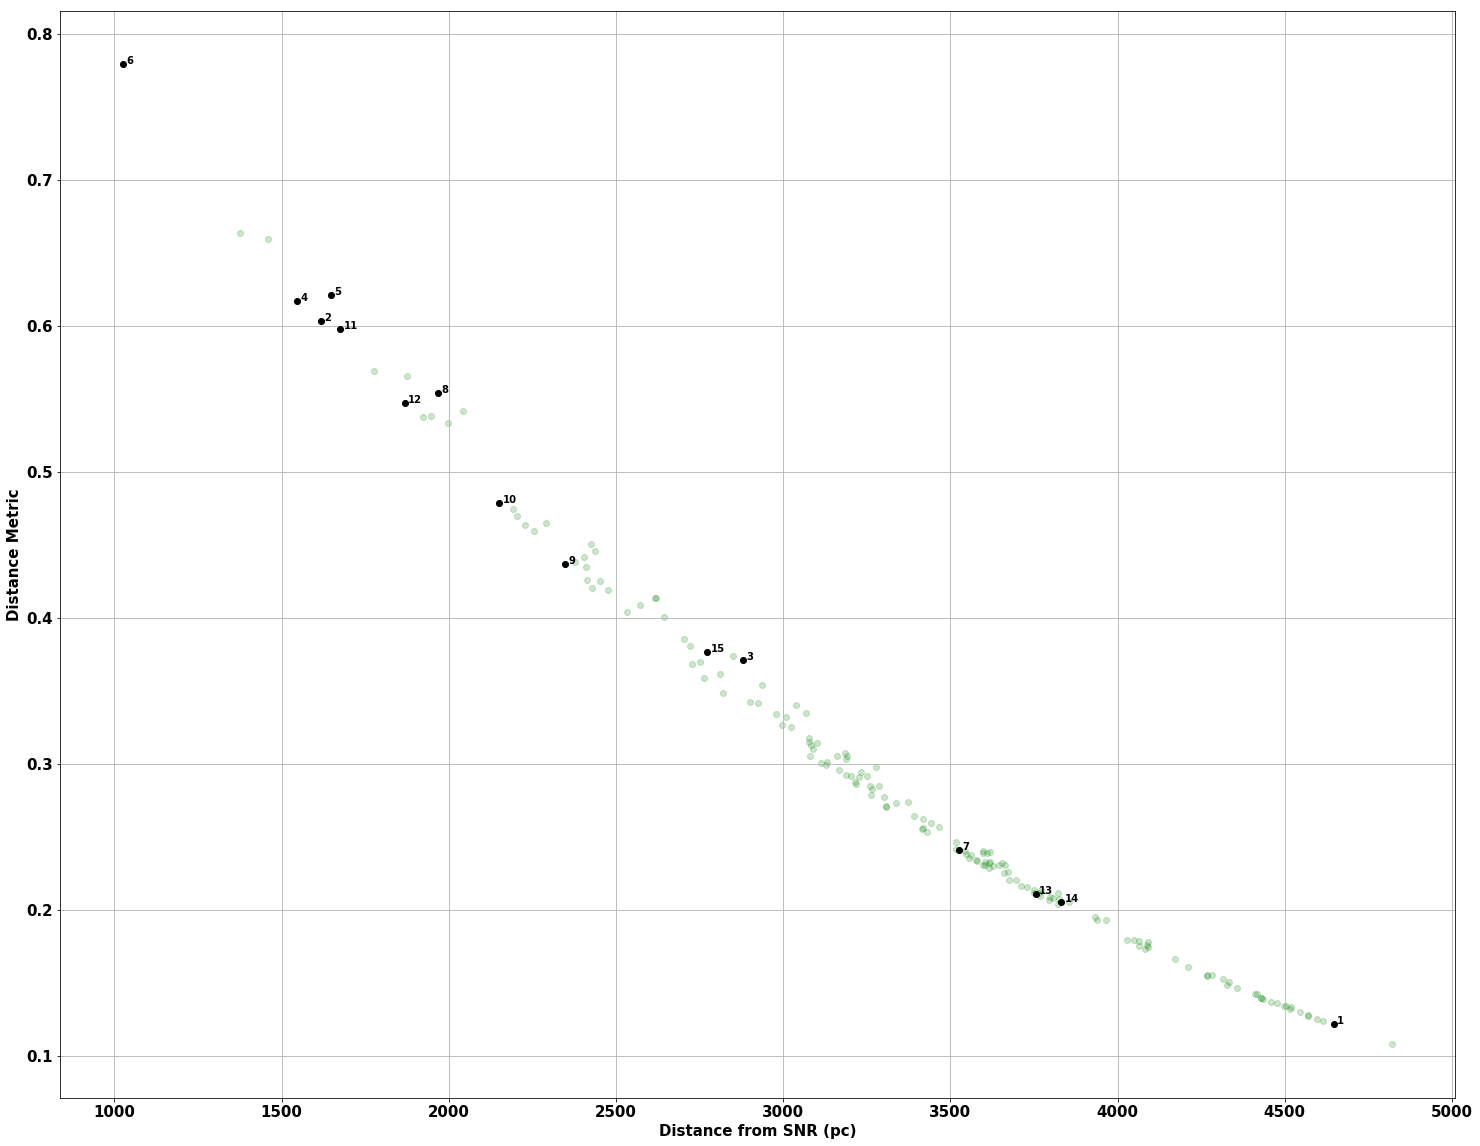

In [62]:
nstart = 1
nend = 15
nstep = nend - nstart + 1
n = np.linspace(nstart,nend,nstep)
plt.figure(figsize=(25,20))


#plt.scatter(np.abs(distance[cuts][metric_rank_index]), distance_metric[cuts][metric_rank_index], c = 'g',alpha = 0.2 , label = 'Unselected Stars')
#plt.plot(np.abs(distance[cuts][metric_rank_index[0:15]]), distance_metric[cuts][metric_rank_index[0:15]], 'ko' , label = 'Top 15 Stars')
#for i, txt in enumerate(n):
#    plt.annotate(int(txt), xy = (np.abs(distance[cuts][metric_rank_index[i]]), distance_metric[cuts][metric_rank_index[i]]) ,
#                 xytext = (np.abs(distance[cuts][metric_rank_index[i]])+10, distance_metric[cuts][metric_rank_index[i]] ), 
#                 size = 10)

    
plt.scatter(np.abs(snr_dist - distance[cuts][metric_rank_index]), distance_metric[cuts][metric_rank_index], c = 'g',alpha = 0.2 , label = 'Unselected Stars')
plt.plot(np.abs(snr_dist - distance[cuts][metric_rank_index[0:nend]]), distance_metric[cuts][metric_rank_index[0:nend]], 'ko' , label = 'Top 15 Stars')    
for i, txt in enumerate(n):
    plt.annotate(int(txt), xy = (np.abs(snr_dist - distance[cuts][metric_rank_index[i]]), distance_metric[cuts][metric_rank_index[i]]) ,
                 xytext = (np.abs(snr_dist - distance[cuts][metric_rank_index[i]])+10, distance_metric[cuts][metric_rank_index[i]] ), 
                 size = 10)



#plt.plot(distance_metric[cuts][metric_rank_index], np.abs(snr_dist - distance[cuts][metric_rank_index]), 'g.',alpha = 0.2 , label = 'Unselected Stars')
#plt.plot(distance_metric[cuts][metric_rank_index[0:15]], np.abs(snr_dist - distance[cuts][metric_rank_index[0:15]]), 'k.' , label = 'Top 15 Stars')
#plt.legend()
#for i, txt in enumerate(n):
#    plt.annotate(int(txt), xy = (distance_metric[cuts][metric_rank_index[i]],
#                                 np.abs(snr_dist - distance[cuts][metric_rank_index[i]])),
#                 xytext = (distance_metric[cuts][metric_rank_index[i]] +0.005,
#                           np.abs(snr_dist - distance[cuts][metric_rank_index[i]]) -20 ), 
#                 size = 10)


font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
axis_font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)
plt.xlabel('Distance from SNR (pc)',**axis_font)
plt.ylabel('Distance Metric',**axis_font)
plt.grid()
plt.savefig(snr_name + ' Distance from SNR vs Distance Metric.jpeg')

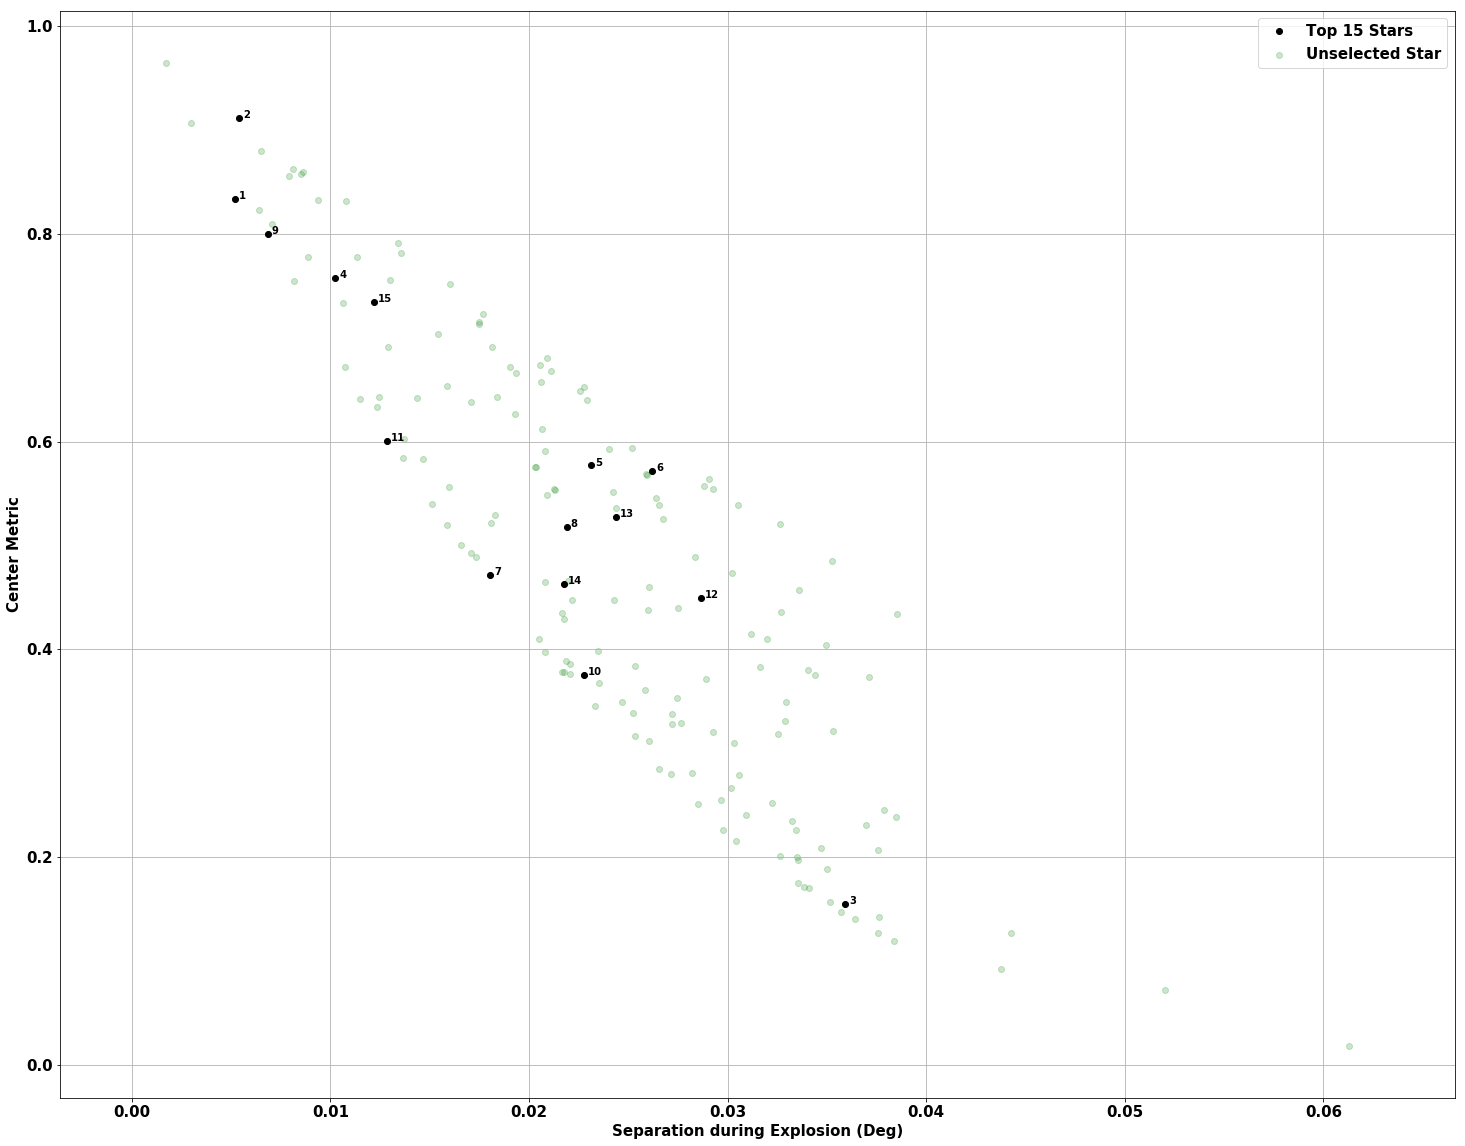

In [63]:
nstart = 1
nend = 15
nstep = nend - nstart + 1
n = np.linspace(nstart,nend,nstep)
plt.figure(figsize=(25,20))

plt.scatter(pt_dist_to_center[cuts][metric_rank_index], center_metric[cuts][metric_rank_index], c='g',alpha = 0.2 , label = 'Unselected Star')
plt.plot(pt_dist_to_center[cuts][metric_rank_index[0:nend]], center_metric[cuts][metric_rank_index[0:nend]], 'ko' , label = 'Top 15 Stars')
for i, txt in enumerate(n):
    plt.annotate(int(txt), xy = (pt_dist_to_center[cuts][metric_rank_index[i]], center_metric[cuts][metric_rank_index[i]] ),
                 xytext = (pt_dist_to_center[cuts][metric_rank_index[i]] + 0.0002, center_metric[cuts][metric_rank_index[i]] ) , 
                 size = 10)
    
#plt.plot(center_metric[cuts][metric_rank_index], pt_dist_to_center[cuts][metric_rank_index], 'g.',alpha = 0.2 , label = 'Unselected Star')
#plt.plot(center_metric[cuts][metric_rank_index[0:15]],pt_dist_to_center[cuts][metric_rank_index[0:15]], 'k.' , label = 'Top 15 Stars')
#for i, txt in enumerate(n):
#    plt.annotate(int(txt), xy = (center_metric[cuts][metric_rank_index[i]],
#                                 pt_dist_to_center[cuts][metric_rank_index[i]]),
#                 xytext = (center_metric[cuts][metric_rank_index[i]] + 0.005,
#                           pt_dist_to_center[cuts][metric_rank_index[i]] ) , 
#                 size = 10)
plt.xlabel('Separation during Explosion (Deg)',**axis_font)
plt.ylabel('Center Metric',**axis_font)
plt.legend()
plt.grid()
plt.savefig(snr_name + ' Separation vs Center Metric.jpeg')

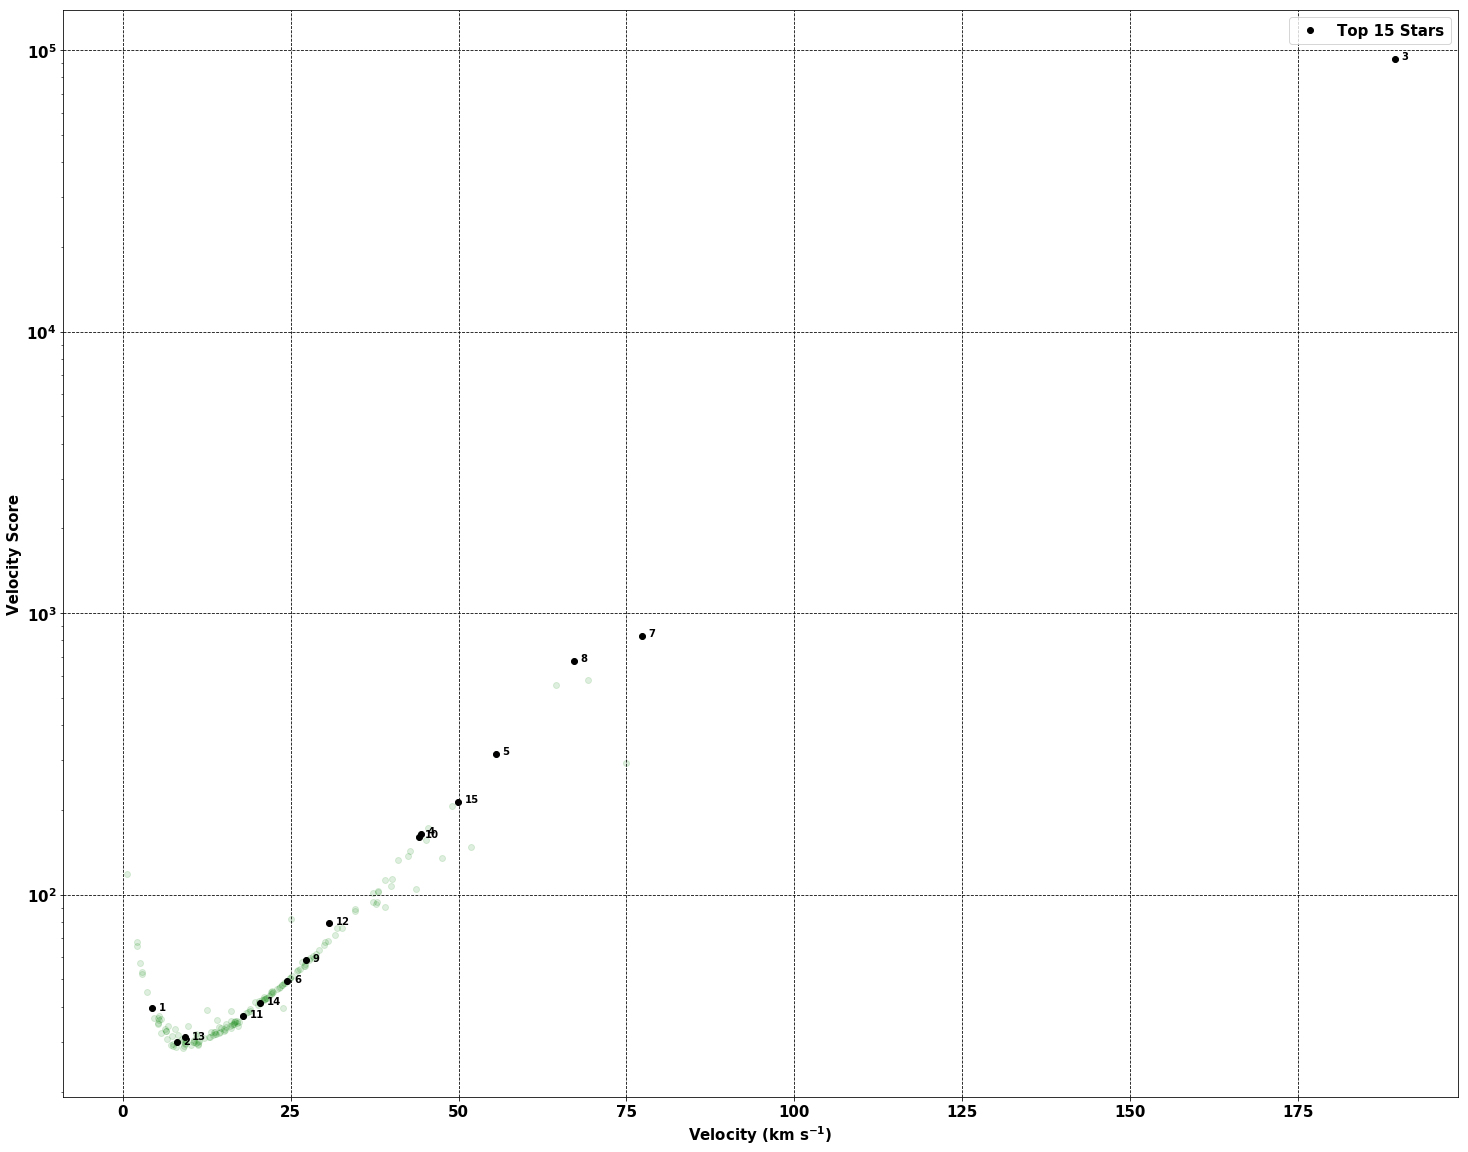

In [64]:
nstart = 1
nend = 15
nstep = nend - nstart + 1
n = np.linspace(nstart,nend,nstep)
plt.figure(figsize=(25,20))
plt.subplot()
plt.xlabel('Velocity (km s'+r'$^{-1}$'+')',**axis_font)
plt.ylabel('Velocity Score',**axis_font)
plt.grid(color='black', ls='dashed')
plt.scatter(sub_twod_vel[cuts][metric_rank_index],star_velocity_metric[cuts][metric_rank_index] , c = 'g', alpha = 0.125 )
plt.semilogy(sub_twod_vel[cuts][metric_rank_index[0:nend]], star_velocity_metric[cuts][metric_rank_index[0:nend]], 'ko', label = 'Top 15 Stars')
plt.legend()
for i, txt in enumerate(n):
    plt.annotate(int(txt), xy = (sub_twod_vel[cuts][metric_rank_index[i]],
                                 star_velocity_metric[cuts][metric_rank_index[i]]),
                 xytext = (sub_twod_vel[cuts][metric_rank_index[i]] +1,
                           star_velocity_metric[cuts][metric_rank_index[i]] - 0.5 ), 
                 size = 10)
plt.savefig(snr_name + ' Velocity Score vs Velocity plot - y log scaled.jpeg')

b'Gaia DR2 4095461705736772480'
b'Gaia DR2 4095461563976935040'
b'Gaia DR2 4095461533938091136'
b'Gaia DR2 4095461563976933632'
b'Gaia DR2 4095461568297821312'
b'Gaia DR2 4095461529617193728'
b'Gaia DR2 4095461529617193856'
b'Gaia DR2 4095461529617193600'
b'Gaia DR2 4095461533938081408'
b'Gaia DR2 4095461533938081024'
b'Gaia DR2 4095461533938080000'


In [63]:
from astropy import units as u
pmra_unit = pmra*u.arcmin*10**-3
pmra_todeg = pmra_unit.to(u.deg)
pmra_deg = pmra_todeg.value *snr_age
pmdec_unit = pmdec*u.arcmin*10**-3
pmdec_todeg = pmdec_unit.to(u.deg)
pmdec_deg = pmdec_todeg.value *snr_age

In [51]:
stars_testing = SkyCoord(ra=ra*u.deg, dec= dec*u.deg, 
                 distance = distance*u.pc,
                 pm_ra_cosdec =  pmra*u.mas/u.yr, 
                 pm_dec = pmdec* u.mas/u.yr, 
                 radial_velocity = 0.0*u.km/u.s)
pt_pos_testing = stars.apply_space_motion(dt=-snr_age*u.yr)

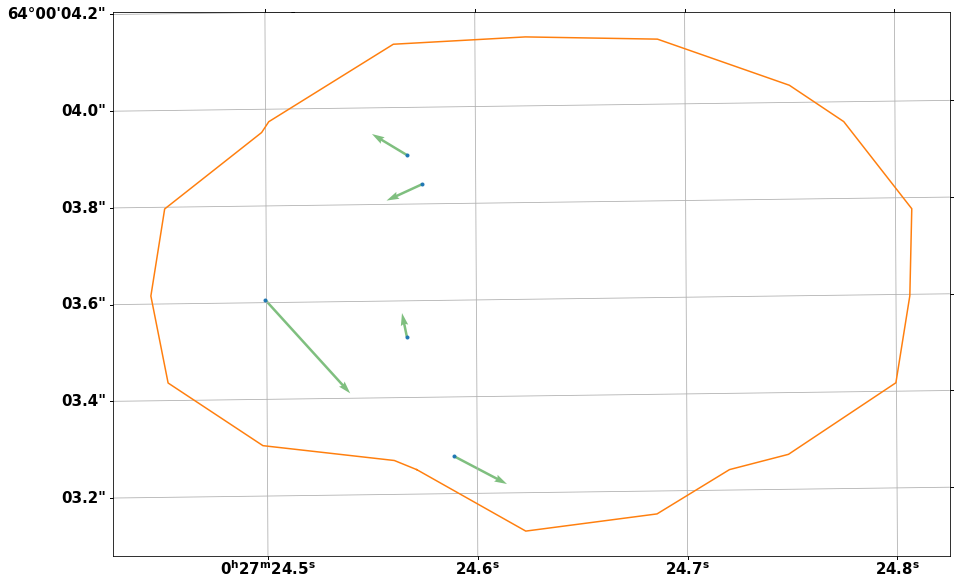

In [115]:
tn = 5
plt.figure(figsize = (15,10))
plt.subplot(projection=wcs)
plt.plot(ra[metric_rank_index][0:tn],dec[metric_rank_index][0:tn],'.')
plt.plot(contour_ra,contour_dec)
plt.quiver(ra[metric_rank_index][0:tn],dec[metric_rank_index][0:tn],pmra_deg[metric_rank_index][0:tn],pmdec_deg[metric_rank_index][0:tn],
           angles='xy', scale_units='xy', 
           color = 'g', scale=1, 
           alpha = 0.5, width = 0.003)
plt.gca().invert_xaxis()
plt.grid()